# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset 

In [3]:
df = pd.read_csv('BankChurners.csv')
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


After loading the data, let's first check all the variable names and their variable types.

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Check the variable types using the info function of pandas dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Some variables are not useful for our task, such as Naive Bayes Classifer Attrition Flag variables, Months Inactive, Contacts Inactive, Total Amount Churned (Q1 to Q4), and Total Count Churned (Q1 to Q4). Therefore we can remove these six columns.

In [6]:
columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
           'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
df.drop(columns, inplace=True, axis=1)

Create a dummy variable of Gender so that Male is equal to 1 and Female is equal to 0. 

In [7]:
df['Gender'].replace({'M':1, 'F':0}, inplace=True)

Create a copy of data set by removing customers with unknown marital status and unknown education level

In [8]:
with_status = df[df['Marital_Status'] != 'Unknown']
with_status.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,0,3418.0,1887,20,0.000
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,0,4716.0,816,28,0.000
5,713061558,Existing Customer,44,1,2,Graduate,Married,$40K - $60K,Blue,36,3,4010.0,1247,2763.0,1088,24,0.311


In [9]:
with_level = df[df['Education_Level'] != 'Unknown']
with_level.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,0,4716.0,816,28,0.000


# Exploratory Data Analysis

An easy and straight forward way is to use the describe function. It will reflect the basic statistics of numeric variables.

In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,0.470919,2.346203,35.928409,3.812580,8631.953698,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,0.499178,1.298908,7.986416,1.554408,9088.776650,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,0.000000,13.000000,1.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,0.000000,1.000000,31.000000,3.000000,2555.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,0.000000,2.000000,36.000000,4.000000,4549.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,1.000000,3.000000,40.000000,5.000000,11067.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,1.000000,5.000000,56.000000,6.000000,34516.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


Then we look at every indicator variable one by one. Start from `Attrition_Flag`.

In [11]:
df.groupby('Attrition_Flag')['Credit_Limit'].mean()

Attrition_Flag
Attrited Customer    8136.039459
Existing Customer    8726.877518
Name: Credit_Limit, dtype: float64

In [12]:
df.groupby('Attrition_Flag')['Months_on_book'].mean()

Attrition_Flag
Attrited Customer    36.178242
Existing Customer    35.880588
Name: Months_on_book, dtype: float64

Next we look at Gender

In [14]:
nummale = df[df['Gender']==1]['Gender'].count()
numfemale = df[df['Gender']==0]['Gender'].count()
print('male:', nummale)
print('female:', numfemale)

male: 4769
female: 5358


The sample of attrition flag for women is much higher than men. This is probably due to the lower credit scores given to women first.

Then it comes to Age. First let's use histograms to see the distribution of all the people.

C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

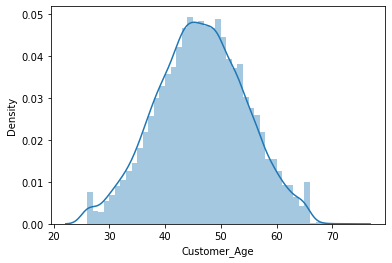

In [15]:
sns.distplot(df['Customer_Age'])

Split people by 'Married' status and plot histgrams separately

C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

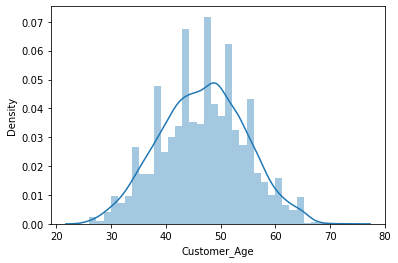

In [123]:
sns.distplot(with_status[with_status['Marital_Status']=='Married']['Customer_Age'])

C:\Users\14087\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

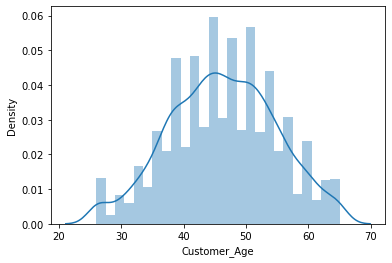

In [124]:
sns.distplot(with_status[with_status['Marital_Status']=='Single']['Customer_Age'])

Alternatively, we can use `matplotlib.pyplot.hist()`, which can be called with DataFrame object directly

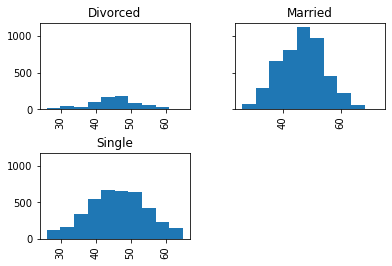

In [125]:
with_status.hist(column='Customer_Age', by='Marital_Status', sharey=True)
plt.show()

Split people by 'Gender' and plot histgrams separately

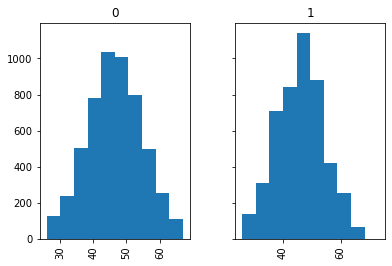

In [126]:
df.hist(column='Customer_Age', by='Gender', sharey=True)
plt.show()

Split people by 'Education_Level' and plot histgrams separately

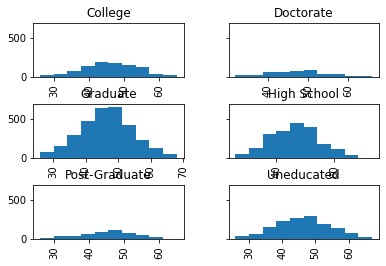

In [127]:
with_level.hist(column='Customer_Age', by='Education_Level', sharey=True)
plt.show()

Group customers by their education level place and compute their credit limit

In [132]:
df.groupby('Education_Level')['Credit_Limit'].mean()

Education_Level
College          8684.536130
Doctorate        8413.258980
Graduate         8566.100927
High School      8605.823547
Post-Graduate    8862.560465
Uneducated       8899.509011
Unknown          8491.798947
Name: Credit_Limit, dtype: float64

It appears that customers uneducated have the highest average credit limit than the other five education levels.

Number of attrited customers

In [128]:
attrited_customer = df[df['Attrition_Flag'] == 'Attrited Customer']['Attrition_Flag'].count()
attrited_customer

1627

Percent of attrited customers in the Bank Churned data set

In [129]:
attrited_customer / 10127

0.1606596227905599

The percent of attrited customers is 16.07%. Now let's find more information on attrited customers

Average customer age for attrited customers

In [130]:
df[df['Attrition_Flag']=='Attrited Customer']['Customer_Age'].mean()

46.659496004917024

Average credit limit for attrited customers

In [131]:
df[df['Attrition_Flag']=='Attrited Customer']['Credit_Limit'].mean()

8136.039459127228

# Data Visualizations

In [18]:
ar = df[df['Attrition_Flag']=='Attrited Customer'][['Customer_Age','Credit_Limit','Gender']]

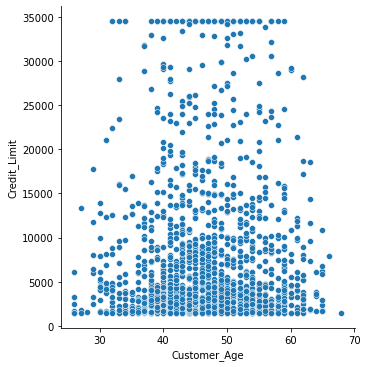

In [134]:
sns.relplot(x='Customer_Age', y='Credit_Limit', data=ar)

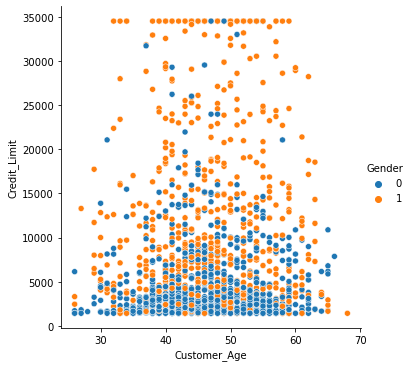

In [135]:
# Scatterplot arguments
sns.relplot(x='Customer_Age', y='Credit_Limit', data=ar, hue='Gender')   # Color by gender

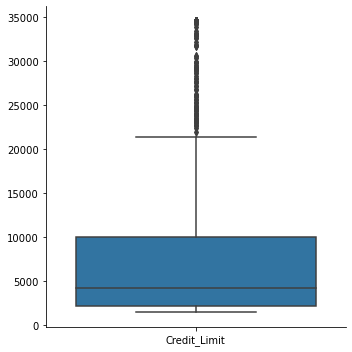

In [136]:
sns.catplot(data=ar[['Credit_Limit']], kind='box')

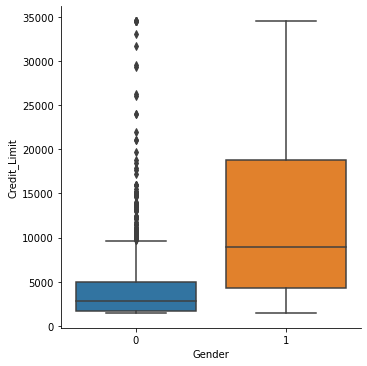

In [137]:
sns.catplot(y='Credit_Limit', x='Gender', data=ar, kind='box')

Using `seaborn.pairplot` to plot pairwise relationships in the attrited customer dataset

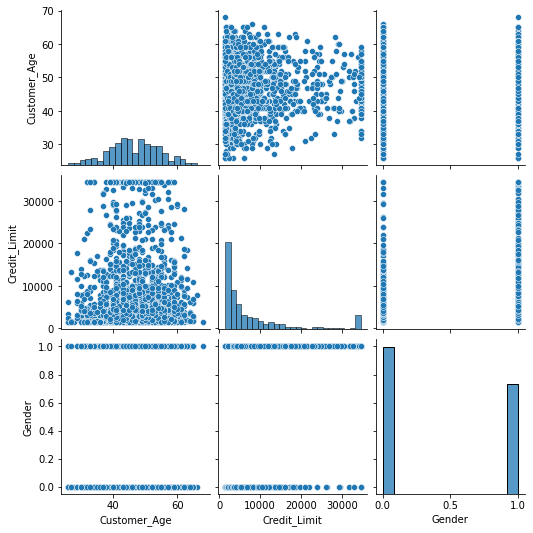

In [138]:
sns.pairplot(ar)

# Building Machine Learning Model

The `BankChurner` dataset contains both categorical and numeric features. We will use this dataset to predict whether a bank customer is attrited or not. 

Let's split the data into training and testing sets and use the `Attrition_Flag` column as a target.

## Training and Testing Set

Feature variables

In [21]:
X = df.iloc[:, df.columns!='Attrition_Flag'][['Customer_Age','Gender','Dependent_count','Months_on_book','Education_Level','Marital_Status','Income_Category','Card_Category','Credit_Limit']]

In [22]:
X.head(3)

,Customer_Age,Gender,Dependent_count,Months_on_book,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,45,1,3,39,High School,Married,$60K - $80K,Blue,12691.0
1,49,0,5,44,Graduate,Single,Less than $40K,Blue,8256.0
2,51,1,3,36,Graduate,Married,$80K - $120K,Blue,3418.0


Target variable

In [23]:
y = df.iloc[:,df.columns=='Attrition_Flag']

In [24]:
y.head(3)

,Attrition_Flag
0,Existing Customer
1,Existing Customer
2,Existing Customer


Split data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [26]:
print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (7088, 9)  y_train: (7088, 1)
X_test: (3039, 9)  y_test: (3039, 1)


## Logistic Regression

Choose model: `sklearn.linear_model.LogisticRegression`

In [265]:
from sklearn.linear_model import LogisticRegression

In [253]:
# Categorical variables in the Bank Churner data set
X_train[['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]

,Education_Level,Marital_Status,Income_Category,Card_Category
6647,Graduate,Single,Unknown,Blue
6987,Uneducated,Married,Less than $40K,Blue
7267,High School,Married,$40K - $60K,Blue
5954,Uneducated,Single,Less than $40K,Blue
4410,High School,Married,Less than $40K,Blue
...,...,...,...,...
509,Uneducated,Single,Unknown,Blue
210,High School,Married,Less than $40K,Blue
9753,Post-Graduate,Married,Less than $40K,Blue
6113,Unknown,Divorced,Unknown,Blue


We need to convert the categorical data into numeric features. The simplest way is to one-hot encode each categorical feature with the `OneHotEncoder`. 

Let's give an example for the `Marital_Status` and `Education_Level`. Note that we also encounter some data which are missing. We will use a `SimpleImputer` to replace the missing values with a constant values.

In [255]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

ohe = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded = ohe.fit_transform(X_train[['Marital_Status','Education_Level']])
X_encoded.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [256]:
X_encoded

<7595x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15190 stored elements in Compressed Sparse Row format>

This way, it is possible to encode the categorical features. However, we also want to standardize the numerical features. Thus, we need to split the original data into 2 subgroups and apply a different preprocessing: (i) one-hot encoding for the categorical data and (ii) standard scaling for the numerical data. We also need to handle missing values in both cases. 

For the categorical column, we replace the missing values by the string `'missing_values'` which will be interpreted as a category on its own. For the numerical data, we will replace the missing data by the mean values of the feature of interest.

In [259]:
col_cat = ['Education_Level', 'Marital_Status']
col_num = ['Customer_Age','Gender','Dependent_count','Months_on_book','Credit_Limit']

X_train_cat = X_train[col_cat]
X_train_num = X_train[col_num]
X_test_cat = X_test[col_cat]
X_test_num = X_test[col_num]

In [260]:
from sklearn.preprocessing import StandardScaler

scaler_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_train_cat_enc = scaler_cat.fit_transform(X_train_cat)
X_test_cat_enc = scaler_cat.transform(X_test_cat)

scaler_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
X_train_num_scaled = scaler_num.fit_transform(X_train_num)
X_test_num_scaled = scaler_num.transform(X_test_num)

In [261]:
X_train_cat_enc

<7595x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15190 stored elements in Compressed Sparse Row format>

In [262]:
X_train_num_scaled

array([[-0.04452 , -0.93459 ,  1.270619,  0.752847,  0.532317],
       [-0.168877, -0.93459 , -0.260089,  0.005347, -0.624077],
       [ 0.204194, -0.93459 ,  1.270619,  0.87743 , -0.787694],
       ...,
       [-1.909875, -0.93459 , -1.025444, -1.8634  , -0.356043],
       [-1.412447, -0.93459 , -1.025444, -1.489651, -0.787694],
       [ 1.19905 ,  1.069988,  1.270619,  0.005347, -0.258516]])

We should apply these transformations on the training and testing sets

In [263]:
import numpy as np
from scipy import sparse

X_train_scaled = sparse.hstack((X_train_cat_enc,
                                sparse.csr_matrix(X_train_num_scaled)))
X_test_scaled = sparse.hstack((X_test_cat_enc,
                               sparse.csr_matrix(X_test_num_scaled)))

Once the transformation is done, we can combine the informations which are all numerical now. Finally, we use our `LogisticRegression` classifier as a model.

In [264]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test)
print('Accuracy score of the {} is {:.2f}'.format(clf.__class__.__name__, accuracy))

Accuracy score of the LogisticRegression is 0.84


C:\Users\14087\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The logistic regression predicts for attrited customers with an accuracy score of 84%. 

## Support Vector Machine

In the `BankChurner` dataset, we are only using numeric features. We will still use this dataset to predict whether a bank customer is attrited or not.

In [275]:
X = df.iloc[:, df.columns!='Attrition_Flag'][['Customer_Age','Gender','Dependent_count','Months_on_book','Credit_Limit']]

Split data into training and testing

In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### Set model hyperparameters

Suppose we use the default model parameters

Choose model: `sklearn.svm.LinearSVC`

In [277]:
from sklearn.svm import SVC
model = SVC()

Reset model hyperparameter

In [278]:
model = SVC(C=1000.0, class_weight='balanced', gamma=0.005)

In [279]:
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))

C:\Users\14087\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   precision    recall  f1-score   support

Attrited Customer       0.80      0.98      0.88      1220
Existing Customer       1.00      0.95      0.97      6375

         accuracy                           0.96      7595
        macro avg       0.90      0.97      0.93      7595
     weighted avg       0.96      0.96      0.96      7595



It shows our precision, recall, and f1-score. Support means the sample size of 7595 instances. 1220 of the sample is contained within attrited customer and 6375 are contained within existing customer.

In the attrited customer category:

- The precision of 0.80 is the ratio of bank customers predicted to be in the attrited customer category, which is pretty good.
- The recall of 0.98 is the ratio of bank customers identified from those that were real attrited customers, which is great.
- The f-1 score of 0.88, which is pretty close to 1. This f-1 score means that this classification model could be improved upon.

In the existing customer category:

- The precision of 1.00 is the ratio of bank customers predicted to be in the existing customer category, which is much better than the attrited customer category.
- The recall of 0.95 is the ratio of bank customers identified from those that were real existing customers, which is worse than the attrited customer category.
- The f-1 score of 0.97, which is closer to 1. This f-1 score means that this classification model performs well.

## Kernalized SVM

Choose model: `sklearn.preprocessing.StandardScalar`

In [280]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Try scaling this data set using Standard Scalar
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [281]:
# create a svm Classifier
svc_ss = SVC(kernel='linear') # linear kernel

# train the model using the train data
svc_ss.fit(X_train_ss, y_train)

# predict the churn for test dataset
y_pred_ss = svc_ss.predict(X_test_ss)

C:\Users\14087\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [282]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc_ss_acc = metrics.accuracy_score(y_test, y_pred_ss)
print("The Model Trained with Scaled Data")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_ss.predict(X_train)))
print("Accuracy Test", svc_ss_acc)

The Model Trained with Scaled Data


C:\Users\14087\miniconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy Train: 0.8393680052666228
Accuracy Test 0.8392575039494471


## Decision Tree

Choose model: `sklearn.tree.DecisionTreeClassifier`

In [233]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree = dtree.fit(X_train, y_train)

In [234]:
X = df[['Customer_Age','Gender','Dependent_count','Months_on_book','Credit_Limit']]

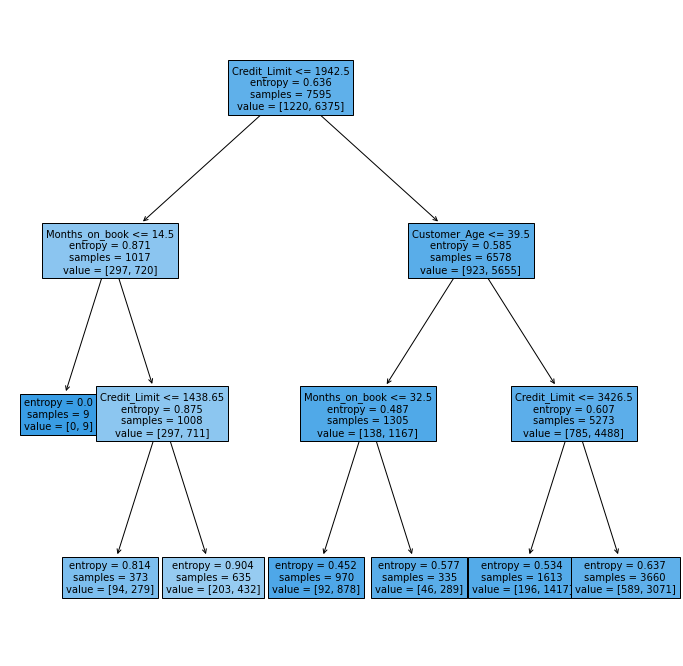

In [235]:
# plot tree
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dtree, fontsize=10, feature_names=X.columns, filled=True)
plt.show()

In [236]:
# predict the churn for test dataset
y_pred_dtree = dtree.predict(X_test)
y_pred_dtree

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

In [237]:
# model accuracy
dtree_acc = metrics.accuracy_score(y_test, y_pred_dtree)
print("Decision Tree")
print("Accuracy Train:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print("Accuracy Test", dtree_acc)

Decision Tree
Accuracy Train: 0.8393680052666228
Accuracy Test 0.8392575039494471


## Clustering Model

Choose model: `sklearn.preprocessing.StandardScaler` 

In [107]:
##Setting Customer_Age and Months_on_Book to floats in order to scale
scaler = StandardScaler()

Convert numerical features `Customer_Age` and `Months_on_book` to float data type

In [108]:
df['Customer_Age'] = df.Customer_Age.astype(float)
df['Months_on_book'] = df.Months_on_book.astype(float)

In [109]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,4716.0,0,4716.0,816,28,0.000


Transform numerical variables and fit them in the `StandardScalar` model

In [112]:
#scaling variables
df[['Customer_Age_S', 'Months_on_book_S', 'Credit_Limit_S']] = scaler.fit_transform(df[['Customer_Age', 'Months_on_book', 'Credit_Limit']])

In [113]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Customer_Age_S,Months_on_book_S,Credit_Limit_S
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5,12691.0,777,11914.0,1144,42,0.061,-0.165406,0.384621,0.446622
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,6,8256.0,864,7392.0,1291,33,0.105,0.333570,1.010715,-0.041367
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4,3418.0,0,3418.0,1887,20,0.000,0.583058,0.008965,-0.573698
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34.0,3,3313.0,2517,796.0,1171,20,0.760,-0.789126,-0.241473,-0.585251
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,5,4716.0,0,4716.0,816,28,0.000,-0.789126,-1.869317,-0.430877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40.0,3,4003.0,1851,2152.0,15476,117,0.462,0.458314,0.509840,-0.509330
10123,710638233,Attrited Customer,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25.0,4,4277.0,2186,2091.0,8764,69,0.511,-0.664382,-1.368442,-0.479181
10124,716506083,Attrited Customer,44.0,F,1,High School,Married,Less than $40K,Blue,36.0,5,5409.0,0,5409.0,10291,60,0.000,-0.290150,0.008965,-0.354626
10125,717406983,Attrited Customer,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36.0,4,5281.0,0,5281.0,8395,62,0.000,-2.036565,0.008965,-0.368710


In order to determine what were the optimal number of clusters, we create a function named `optimise` to identify optimum number of clusters

In [116]:
#identifiying optimum # of clusters
def optimise(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Numbers of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

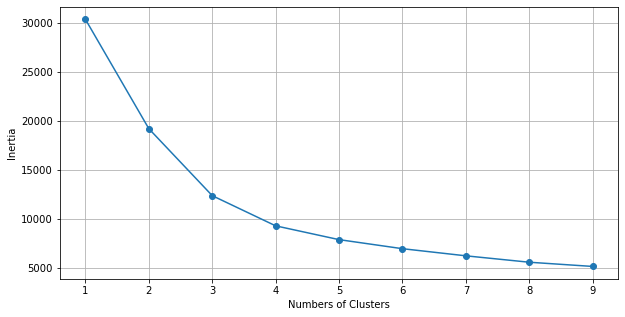

In [117]:
optimise(df[['Customer_Age_S', 'Months_on_book_S', 'Credit_Limit_S']], 10)

In the plot above we can see the inertia decreases as we increase clusters. There is a large change in inertia from 3 cluster moving forward.

In [119]:
#setting up kmeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df[['Customer_Age_S', 'Months_on_book_S', 'Credit_Limit_S']])

KMeans(n_clusters=3)

In [121]:
df['Kmeans_cluster3'] = kmeans.labels_

In [122]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Customer_Age_S,Months_on_book_S,Credit_Limit_S,Kmeans_cluster3
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,...,12691.0,777,11914.0,1144,42,0.061,-0.165406,0.384621,0.446622,0
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44.0,...,8256.0,864,7392.0,1291,33,0.105,0.333570,1.010715,-0.041367,0
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,...,3418.0,0,3418.0,1887,20,0.000,0.583058,0.008965,-0.573698,0
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34.0,...,3313.0,2517,796.0,1171,20,0.760,-0.789126,-0.241473,-0.585251,1
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21.0,...,4716.0,0,4716.0,816,28,0.000,-0.789126,-1.869317,-0.430877,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40.0,...,4003.0,1851,2152.0,15476,117,0.462,0.458314,0.509840,-0.509330,0
10123,710638233,Attrited Customer,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25.0,...,4277.0,2186,2091.0,8764,69,0.511,-0.664382,-1.368442,-0.479181,1
10124,716506083,Attrited Customer,44.0,F,1,High School,Married,Less than $40K,Blue,36.0,...,5409.0,0,5409.0,10291,60,0.000,-0.290150,0.008965,-0.354626,1
10125,717406983,Attrited Customer,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36.0,...,5281.0,0,5281.0,8395,62,0.000,-2.036565,0.008965,-0.368710,1


Using KMeans with `k = 3` on the relationship between the numerical features `Months_on_book` and `Customer_Age`. 

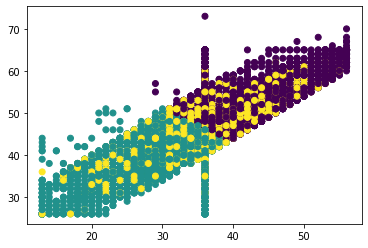

In [131]:
plt.scatter(x=df['Months_on_book'], y = df['Customer_Age'], c =df['Kmeans_cluster3'])
plt.show()

Using KMeans with `k = 3` on the relationship between the numerical features `Credit_Limit` and `Customer_Age`. 

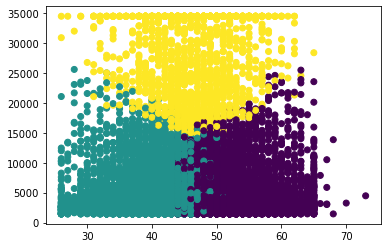

In [133]:
plt.scatter(x=df['Customer_Age'], y = df['Credit_Limit'], c =df['Kmeans_cluster3'])

Using KMeans with `k = 3` on the relationship between the numerical features `Months_on_book` and `Credit_Limit`. 

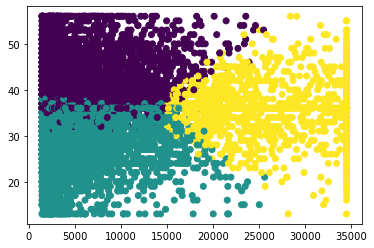

In [134]:
plt.scatter(x=df['Credit_Limit'], y = df['Months_on_book'], c =df['Kmeans_cluster3'])
plt.show()